In [1]:
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# iris 데이터 가지고 확인해 보기
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, 
                                                    test_size=0.3, random_state=11)

dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

- 피처에 대한 중요도를 시각화로 보여주기
- feature_importance라는 함수를 이용해서 간단하게 출력이 가능하다.

feature importance{0} [0.     0.0214 0.5418 0.4368]
sepal length (cm):0.000
sepal width (cm):0.021
petal length (cm):0.542
petal width (cm):0.437


<AxesSubplot:>

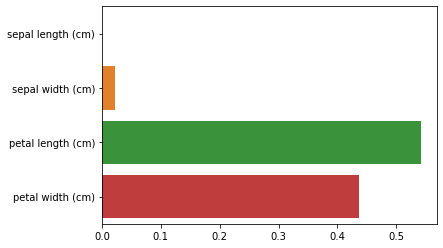

In [2]:
import seaborn as sns
import numpy as np
import pandas as pd

# feature importance 추출
print("feature importance{0}", format(np.round(dt_clf.feature_importances_, 4)))

# 시각화로 매칭을 진행하자
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print("{0}:{1:.3f}".format(name, value))

# 시각화로 진행
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

In [3]:
# 타이타닉 데이터로 과적합을 살펴보자
dt_tt = sns.load_dataset("titanic")

### 과적합을 시각화를 통해 살펴보자!

In [4]:
dt_tt

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [5]:
# 결측치 존재하지만, 시간 관계상 생략
dt_tt.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [6]:
df_ttsp = dt_tt[["survived","pclass","fare"]] # 2차원 데이터로 시각화를 진행해서 과적합을 보여드리려고 2개만 임의로 추출

In [7]:
df_ttsp

,survived,pclass,fare
0,0,3,7.2500
1,1,1,71.2833
2,1,3,7.9250
3,1,1,53.1000
4,0,3,8.0500
...,...,...,...
886,0,2,13.0000
887,1,1,30.0000
888,0,3,23.4500
889,1,1,30.0000


In [8]:
import matplotlib.pyplot as plt

# Classifier의 Decision Boundary를 시각화하는 함수
def visualize_boundary(model, X, y):
    fig, ax = plt.subplots()
    
    # train data scatter plot으로 나타내기
    ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=25, cmap="rainbow", edgecolor="k", 
               clim=(y.min(), y.max()), zorder=3)
    ax.axis("tight")
    ax.axis("off")
    xlim_start, xlim_end = ax.get_xlim()
    ylim_start, ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 train data model 학습
    model.fit(X, y)
    
    # meshgrid 형태인 모든 좌표값으로 예측 수행
    xx, yy = np.meshgrid(np.linspace(xlim_start, xlim_end, num=200), np.linspace(ylim_start, ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf()를 이용하여 class boundary를 visualization 수행
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3, 
                           levels=np.arange(n_classes + 1) - 0.5, 
                           cmap="rainbow", clim=(y.min(), y.max()), zorder=1)

In [9]:
# 학습 진행하기
dt_clf = DecisionTreeClassifier(random_state=156)

X_train, X_test, y_train, y_test = train_test_split(df_ttsp[["pclass","fare"]], 
                                                    df_ttsp["survived"], 
                                                    test_size=0.3, random_state=111)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

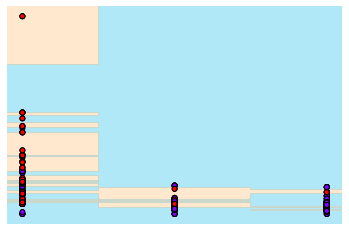

In [10]:
# 먼저 저번 시간에 배운 것처럼 튜닝을 하지 않고 바로 진행해보자
df_clf = DecisionTreeClassifier().fit(X_train, y_train)
visualize_boundary(dt_clf, df_ttsp[["pclass","fare"]], df_ttsp["survived"])
# 전체 데이터에 대해서 시각화...

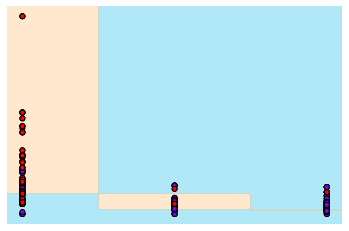

In [12]:
# 하이퍼파라미터를 조정해서 진행
dt_clf1 = DecisionTreeClassifier(max_depth=4, min_samples_split=7, random_state=111).fit(X_train, y_train)
visualize_boundary(dt_clf1, df_ttsp[["pclass","fare"]], df_ttsp["survived"])
# 전체 데이터에 대해서 시각화...

### GridSearchCV를 이용한 파라미터 튜닝

- 튜닝 전 베이스 모델 정확도

In [13]:
dt_clf = DecisionTreeClassifier(random_state=156)

X_train, X_test, y_train, y_test = train_test_split(df_ttsp[["pclass","fare"]], 
                                                    df_ttsp["survived"], 
                                                    test_size=0.3, random_state=111)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [14]:
from sklearn.metrics import accuracy_score

pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print(accuracy)

0.7014925373134329


In [15]:
from sklearn.model_selection import GridSearchCV

params = {
    "max_depth":[4,8,12,14,20,24], 
    "min_samples_split":[5,10,15,20]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring="accuracy", cv=3, verbose=1)
grid_cv.fit(X_train, y_train)
print("평균 정확도:{0:.4f}".format(grid_cv.best_score_))
print("최적의 하이퍼파라미터", grid_cv.best_params_)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
평균 정확도:0.6566
최적의 하이퍼파라미터 {'max_depth': 4, 'min_samples_split': 5}


In [16]:
cv_df = pd.DataFrame(grid_cv.cv_results_)

In [17]:
cv_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003320,0.001269,0.001986,7.059039e-04,4,5,"{'max_depth': 4, 'min_samples_split': 5}",0.644231,0.634615,0.690821,0.656556,0.024545,1
1,0.003024,0.001723,0.002140,9.846597e-04,4,10,"{'max_depth': 4, 'min_samples_split': 10}",0.644231,0.625000,0.690821,0.653351,0.027634,4
2,0.002362,0.000447,0.001013,2.287190e-05,4,15,"{'max_depth': 4, 'min_samples_split': 15}",0.644231,0.625000,0.690821,0.653351,0.027634,4
3,0.001661,0.000470,0.000997,7.867412e-07,4,20,"{'max_depth': 4, 'min_samples_split': 20}",0.644231,0.625000,0.690821,0.653351,0.027634,4
4,0.002996,0.000842,0.001683,9.090832e-04,8,5,"{'max_depth': 8, 'min_samples_split': 5}",0.600962,0.649038,0.657005,0.635668,0.024756,15
5,0.002996,0.000027,0.002211,1.707453e-04,8,10,"{'max_depth': 8, 'min_samples_split': 10}",0.596154,0.634615,0.652174,0.627648,0.023395,19
6,0.002070,0.000904,0.002395,1.336504e-03,8,15,"{'max_depth': 8, 'min_samples_split': 15}",0.625000,0.634615,0.637681,0.632432,0.005402,18
7,0.004788,0.000221,0.001890,3.024699e-04,8,20,"{'max_depth': 8, 'min_samples_split': 20}",0.586538,0.634615,0.657005,0.626053,0.029398,20
8,0.003982,0.000705,0.002686,9.856750e-04,12,5,"{'max_depth': 12, 'min_samples_split': 5}",0.596154,0.644231,0.695652,0.645346,0.040628,8
9,0.002688,0.000500,0.001166,2.386652e-04,12,10,"{'max_depth': 12, 'min_samples_split': 10}",0.552885,0.634615,0.671498,0.619666,0.049564,23


In [18]:
cv_df[["param_max_depth","param_min_samples_split","mean_test_score"]]

,param_max_depth,param_min_samples_split,mean_test_score
0,4,5,0.656556
1,4,10,0.653351
2,4,15,0.653351
3,4,20,0.653351
4,8,5,0.635668
5,8,10,0.627648
6,8,15,0.632432
7,8,20,0.626053
8,12,5,0.645346
9,12,10,0.619666


### 테스트 데이터를 가지고 실제로 정확도를 판단해보자!

In [20]:
max_depth_sel = [4,8,12,16]
min_samples_split_sel = [5,10,15,20]

for maxde, minsp in zip(max_depth_sel, min_samples_split_sel):
    dt_clf = DecisionTreeClassifier(max_depth=maxde, min_samples_split=minsp)
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print("max_depths={0}, min_samples_split={1}, 정확도:{2}".format(maxde, minsp, accuracy))

max_depths=4, min_samples_split=5, 정확도:0.7425373134328358
max_depths=8, min_samples_split=10, 정확도:0.7052238805970149
max_depths=12, min_samples_split=15, 정확도:0.7089552238805971
max_depths=16, min_samples_split=20, 정확도:0.7052238805970149


- 두 수치가 다른데 어떻게 설명할 수 있을까?
- 0.6566 : train
- 0.7425373134328358 : test
- train이 더 낮고, test가 더 높다.

In [21]:
params = {
    "max_depth":[4,8,12,16], 
    "min_samples_split":[5,10,15,20]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring="accuracy", cv=3, verbose=1)
grid_cv.fit(X_train, y_train)
print("평균 정확도:{0:.4f}".format(grid_cv.best_score_))
print("최적의 하이퍼파라미터", grid_cv.best_params_)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
평균 정확도:0.6566
최적의 하이퍼파라미터 {'max_depth': 4, 'min_samples_split': 5}


In [22]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred1)
print(accuracy)

0.7425373134328358


- 과적합에 대해서 필수적으로 꼭 고민하시고
- 우리가 배웠던, 교차검증을 왜 해야 하는지?
- 우리가 모델 파라미터 튜닝을 왜 해야 하는지?
- 물론 좋은 평가지표를 얻을 수도 있지만, 실제로는 과적합이 될 수 있다. 그렇기 때문에 이 부분은 항상 고려해서 모델링을 진행해야 합니다.
- 수업시간의 타이타닉 데이터와 dt는 과적합이 되기 너무나 좋은 모델이라서 조금은 설명하기에 오류가 있을 수 있지만, 그래도 기본적인 과적합은 필수적으로 꼭 알아둬야 합니다.

### 필수과제 1
- 타이타닉 변수들을 바꿔서 시각화 후에 어떤 식으로 과적합이 되는지
- 타이타닉 변수 인코딩 등 전처리해서 시각화를 해보시는 것도 추천드립니다.

### 앙상블 (Ensemble Learning)
- 조화, 균형
- 하나의 모델만 사용하는 것이 아니라 다양한 모델을 사용해서 그 모델의 결과를 바탕으로 가장 최적의 결과를 선정한다.
---
- 보팅(Voting)
- 튜표의 개념
- 하드보팅, 소프트 보팅
- 타이타닉 데이터를 가지고 -> 로지스틱 회귀, DT, RF 세 가지로 예측을 진행해서 투표를 통해 최적의 모델을 선정하고 값을 구한다.
- 어떤 기준으로 선정할 것인가?
- 하드보팅, 소프트보팅을 나누는 개념이 된다.


- 배깅(Bagging)
- 데이터셋을 샘플링하여 여러 개로 나눈 후에 하나의 모델에 학습시키고 예측하여 최적의 값을 구한다.
- 보팅, 배깅의 차이라고 한다면 -> 보팅은 여러가지 모델을 사용해서 학습을 하는 반면, 배깅은 데이터셋을 나눠서 진행한다.
- 타이타닉 데이터가 891개 있으면, 200개씩 랜덤하게 나눠서 추출하여 DT를 학습시키고 해당 결과물을 가지고 선정하는 것
- 배깅의 대표적인 방식이 랜덤 포레스트 알고리즘
- 랜덤 포레스트 -> DT와는 다른 점은 바로 배깅이 들어간다는 것
- DT는 그냥 데이터를 분할하는 형태였다면, RF는 랜덤하게 데이터를 추출해서 나눈다. dt보다 훨씬 성능 및 과적합에 안정적이다.


- 부스팅(Boosting)
- xgboost, LGBM, Cat 등등 흔히 말하는 성능이 가장 좋은 대표적인 모델을 말하는데
- 얘는 가중치를 부여한다.
- 실제 예측값이 틀리면 가중치를 두어서 올바르게 학습할 수 있도록 유도한다.


- 스태깅
- 예측 결과물을 가지고 다시 학습한다.